<a href="https://colab.research.google.com/github/rishigarg0709/Data-Science/blob/master/cat_dog_horse_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
file=files.upload()

Saving images.zip to images.zip


In [6]:
!unzip images.zip

Archive:  images.zip
   creating: images/cats/
  inflating: images/cats/cat.1.jpg   
  inflating: images/cats/cat.10.jpg  
  inflating: images/cats/cat.100.jpg  
  inflating: images/cats/cat.101.jpg  
  inflating: images/cats/cat.102.jpg  
  inflating: images/cats/cat.103.jpg  
  inflating: images/cats/cat.104.jpg  
  inflating: images/cats/cat.105.jpg  
  inflating: images/cats/cat.106.jpg  
  inflating: images/cats/cat.107.jpg  
  inflating: images/cats/cat.108.jpg  
  inflating: images/cats/cat.109.jpg  
  inflating: images/cats/cat.11.jpg  
  inflating: images/cats/cat.110.jpg  
  inflating: images/cats/cat.111.jpg  
  inflating: images/cats/cat.112.jpg  
  inflating: images/cats/cat.113.jpg  
  inflating: images/cats/cat.114.jpg  
  inflating: images/cats/cat.115.jpg  
  inflating: images/cats/cat.116.jpg  
  inflating: images/cats/cat.117.jpg  
  inflating: images/cats/cat.118.jpg  
  inflating: images/cats/cat.119.jpg  
  inflating: images/cats/cat.12.jpg  
  inflating: images/c

In [7]:
!ls

images	images.zip  sample_data


In [8]:
import os
os.listdir("images")

['horses', 'dogs', 'humans', 'cats']

In [0]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

(-0.5, 149.5, 149.5, -0.5)

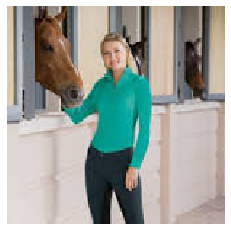

In [21]:
sample_path="images/humans/rider-99.jpg"
img=image.load_img(sample_path,target_size=(150,150,3))
X=image.img_to_array(img)/255.0
plt.imshow(X)
plt.axis("off")

In [20]:
from keras.layers import *
from keras.models import Sequential

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
# instead of using fit method we will use data generator

from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_gen=ImageDataGenerator(rescale=1.0/255.0)
train_geneartor = train_gen.flow_from_directory("images/", target_size=(150,150),class_mode='categorical', batch_size=32)

Found 808 images belonging to 4 classes.


In [32]:
x,y=train_geneartor.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [34]:
history=model.fit_generator(train_geneartor,epochs=60,steps_per_epoch=7)

Epoch 1/60
7/7 [==============================] - 1s 106ms/step - loss: 0.6289 - acc: 0.7455
Epoch 2/60
7/7 [==============================] - 1s 95ms/step - loss: 0.5316 - acc: 0.7889
Epoch 3/60
7/7 [==============================] - 1s 93ms/step - loss: 0.7131 - acc: 0.6920
Epoch 4/60
7/7 [==============================] - 1s 101ms/step - loss: 0.5628 - acc: 0.7812
Epoch 5/60
7/7 [==============================] - 1s 94ms/step - loss: 0.5368 - acc: 0.7545
Epoch 6/60
7/7 [==============================] - 1s 94ms/step - loss: 0.5263 - acc: 0.7708
Epoch 7/60
7/7 [==============================] - 1s 97ms/step - loss: 0.5662 - acc: 0.7634
Epoch 8/60
7/7 [==============================] - 1s 82ms/step - loss: 0.5375 - acc: 0.7980
Epoch 9/60
7/7 [==============================] - 1s 109ms/step - loss: 0.5000 - acc: 0.7723
Epoch 10/60
7/7 [==============================] - 1s 101ms/step - loss: 0.4335 - acc: 0.8170
Epoch 11/60
7/7 [==============================] - 1s 93ms/step - loss: 0.5